# House price predictions

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement 
ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much
more influences price negotiations than the number of bedrooms or a white-picket fence.


Predict the sales price for each house. 
For each Id in the test set, you must predict the value of the SalePrice variable. 

# Step 1 - Load the Dataset

In [17]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the data and have a look at the sample
house_data = pd.read_csv("House_price_data.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 2 - Data Cleaning

In [18]:
# get the number of missing data points per column
house_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [19]:
#Drop NA values
house_data_nadrop = house_data.dropna(axis=1)
house_data_nadrop.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
# how much data did we lose?
print("Columns in original dataset: %d \n" % house_data.shape[1])
print("Columns with na's dropped: %d" % house_data_nadrop.shape[1])

Columns in original dataset: 81 

Columns with na's dropped: 62


Need to check if have any object type values in the dataset. You will get an error if you try to plug 
these variables into most machine learning models in Python without "encoding" them first. 

In [21]:
#Check object type value
house_data_nadrop.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 62, dtype: object

Looks like we have got quiet few Object type features. 
Looking at the data description it doesn't seem they are worth keeping in the file for predictions.

In [22]:
house_data_nadrop = house_data_nadrop.select_dtypes(exclude=['object'])

In [23]:
#A lot object type values, let encode these categorial data
#house_data_nadrop = pd.get_dummies(house_data_nadrop)
#house_data_nadrop.head(10)

In [24]:
house_data_nadrop.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Step3 - Prepare data for modelling

Seperate features and target values.

In [25]:
#Select SalePrice and store into target variable
target = house_data_nadrop['SalePrice']

#drop Saleprice and store rest of the data to features
features = house_data_nadrop.drop('SalePrice', axis = 1)

#Drop Id as we do not need it for modelling purpose
features = features.drop(['Id'], axis = 1)

In [26]:
#Split the data into train and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# Step4 - Data modelling

Select a model according to your requirement or choice and fit the train data.
Once fit, predict new values for house price 

In [27]:
from sklearn.ensemble import RandomForestRegressor

#create the model
regressor_model = RandomForestRegressor(random_state=0)

#fit the model
regressor_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor_model.predict(X_test)

# Step5- Check the accuracy of model

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8706445803898386

# Is the model good enough? 

Lets's check the data distribution. 

C:\Users\User\AppData\Local\Temp\ipykernel_17232\3966407857.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data_nadrop[house_data_nadrop.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),


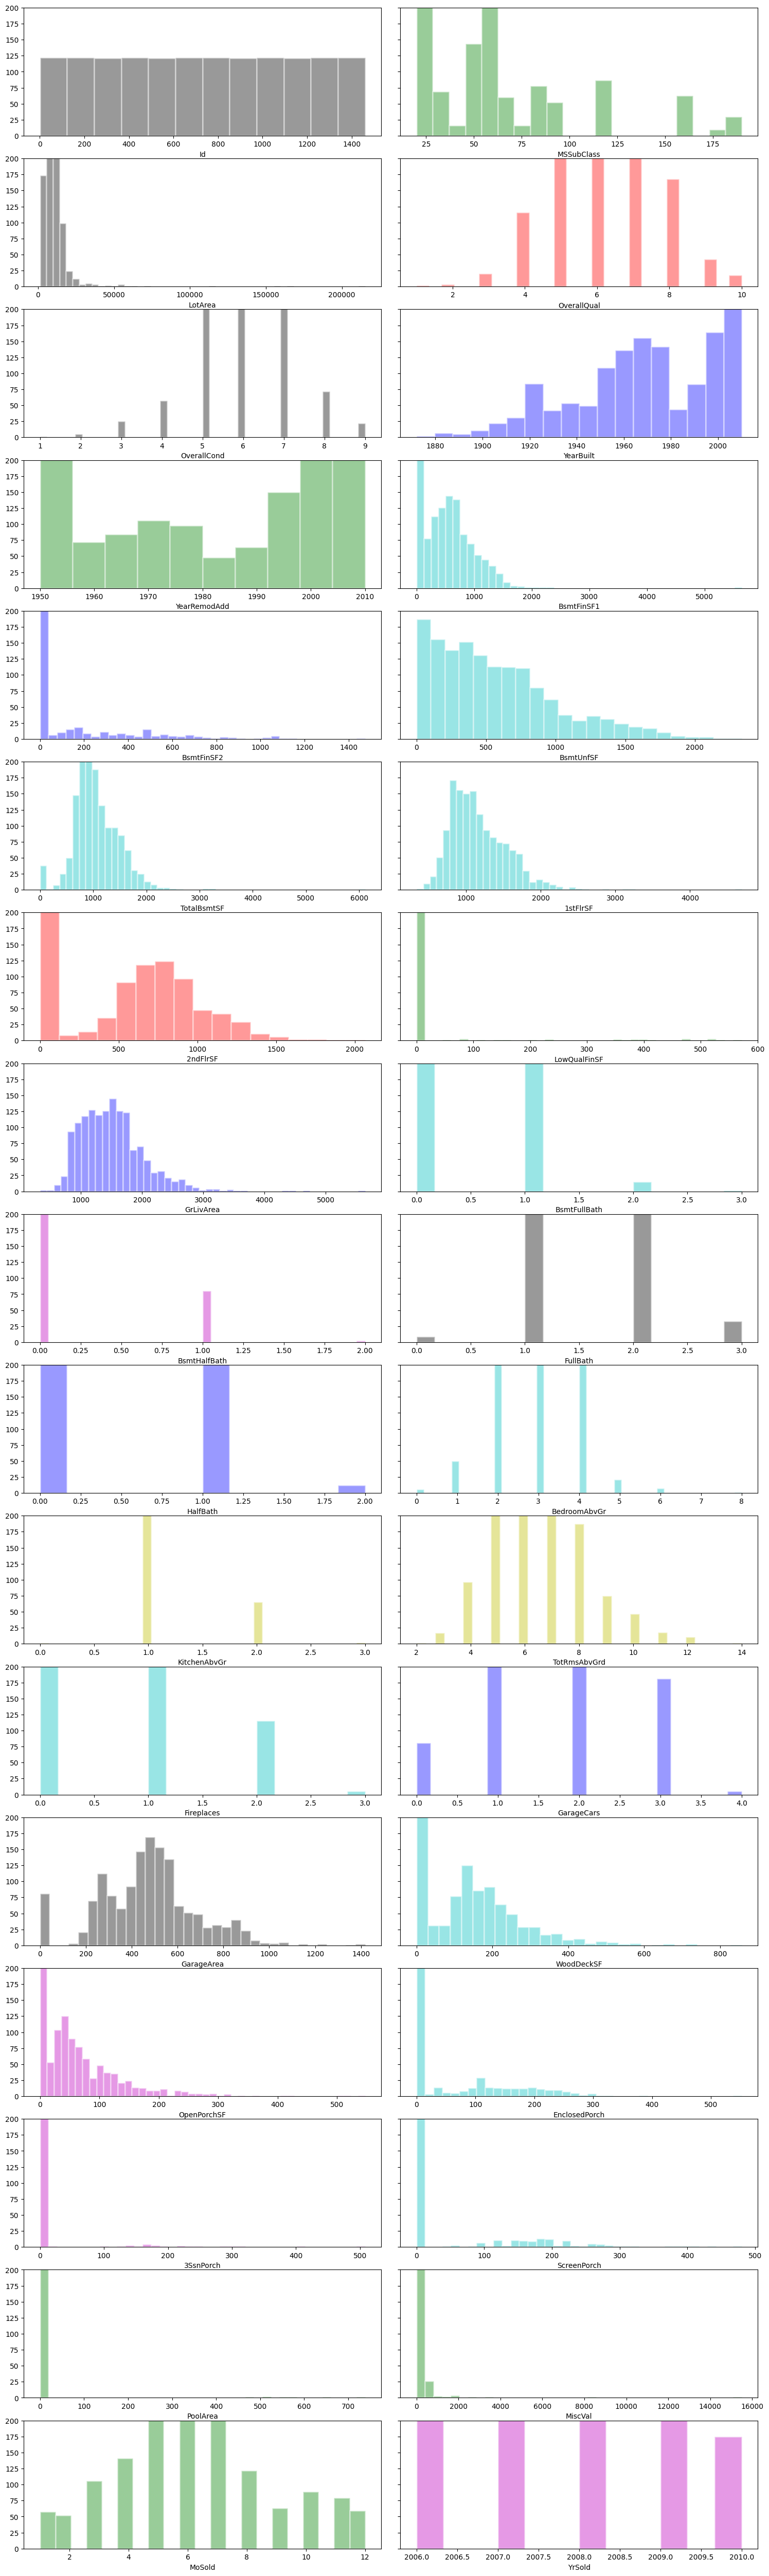

In [29]:
import seaborn as sns
colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =17,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(house_data_nadrop.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(house_data_nadrop[house_data_nadrop.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)    

Looks like data is not normally distributed. Should we try and normalize the data? or standardize it?

Is there any correlation between features?

<Axes: >

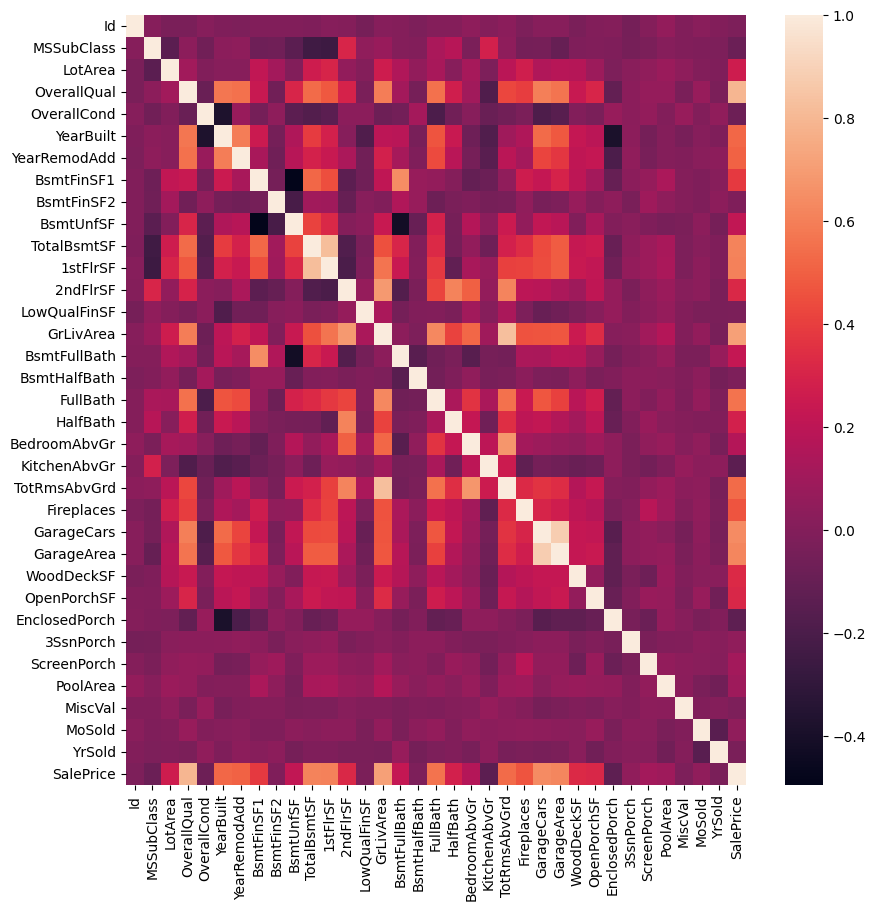

In [30]:
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(house_data_nadrop.corr())

From the above correlation plot it can be seen that Saleprice has strong realationship with - 
GarageArea, GarageCars, GRLivArea, TotalBsmtSF, 1stFlrSF, YearBuilt and OverallQual.

Should we try and use only these features to predict the prices?

In [31]:
#Select SalePrice and store into target variable
target = house_data_nadrop['SalePrice']

#drop Saleprice and store rest of the data to features
features = house_data_nadrop[['GrLivArea', '1stFlrSF', 'YearBuilt', 'OverallQual']].copy()

features 

,GrLivArea,1stFlrSF,YearBuilt,OverallQual
0,1710,856,2003,7
1,1262,1262,1976,6
2,1786,920,2001,7
3,1717,961,1915,7
4,2198,1145,2000,8
...,...,...,...,...
1455,1647,953,1999,6
1456,2073,2073,1978,6
1457,2340,1188,1941,7
1458,1078,1078,1950,5


In [35]:
#Split the data into train and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [36]:
from sklearn.ensemble import RandomForestRegressor

#create the model
regressor_model = RandomForestRegressor(random_state=0)

#fit the model
regressor_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor_model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8392294410526856

No changes in r2 score, we might just stick to previous data.

Now let's make prediction for test data and prepare CSV file

In [40]:
test_pred = regressor_model.predict(X_test)

In [41]:
test_pred

array([150879.        , 195064.87      , 118608.86      , 159663.4       ,
       319342.55      , 309025.61      , 207474.56      ,  99030.91666667,
       187686.66333333, 147611.        , 186324.        , 161415.88666667,
       212504.        , 114272.29      , 158580.76      , 169484.59      ,
       341550.71      , 147014.5       , 220479.02      , 207917.36142857,
       442925.75      , 121350.67      , 144747.        , 113763.5       ,
       204331.        , 171189.66666667, 158552.34      ,  93409.66666667,
       151478.        , 195977.9       ,  99477.93      , 154723.88      ,
       123294.16666667, 171712.62      , 131646.75      ,  98001.5       ,
       161658.        , 216005.05      , 317792.29      , 130921.5       ,
       209496.63      , 119228.75      , 120085.25333333, 159495.        ,
       204662.88      , 234679.9       , 238359.16      , 148333.5       ,
       125557.20714286, 158799.67428571, 201730.4       ,  57343.        ,
       176876.        , 1